# <font color='#3d59c6'> MD004 ENTREGA SESIÓN TEST DE HIPÓTESIS </font>

In [85]:
install.packages("ggplot2")  # Gráficos en R.
library(ggplot2)  # Carga ggplot2.

install.packages("gridExtra")  # Combina gráficos.
library(gridExtra)  # Carga gridExtra.

### <font color='#3d59c6'> PARTE I </font>

1. Plantea un diseño de test de hipótesis que te gustaría aplicar (1pt)

* Hipótesis nula (H0): Recibir clases de esquí no mejora la velocidad promedio en las pistas.
* Hipótesis alternativa (H1): Recibir clases de esquí aumenta la velocidad promedio en las pistas.

**Nivel de significancia (α): 0.05 (5%).**
  
**Test estadístico:** Una prueba t de Student para muestras independientes, ya que se trata de comparar dos medias (velocidad promedio con y sin clases de esquí).

Supuestos

* Las muestras deben ser independientes.
* Los datos deben seguir una distribución normal, o ser suficientemente grandes para aplicar el teorema del límite central.
* Las varianzas deben ser iguales (si no, se usa una versión ajustada del test).

Decisión:

* Si el p-valor es menor que 0.05, se rechaza H₀ y se concluye que recibir clases de esquí mejora la velocidad promedio en las pistas.
* Si el p-valor es mayor o igual que 0.05, no se puede rechazar H₀.

### <font color='#3d59c6'> PARTE I </font>


2. Indica la respuesta correcta de este pequeño test y justifica tu respuesta
(1pt):

**1. ¿Cuál es el propósito del valor crítico en un test de hipótesis?**
1. Indicar la significancia estadística de la prueba
2. Establecer el nivel de confianza
3. Marcar el límite entre rechazar y no rechazar la hipótesis nula
4. Calcular el tamaño de muestra necesario

**Respuesta correcta**

**3. Marcar el límite entre rechazar y no rechazar la hipótesis nula**

Justificación: El valor crítico define el umbral en la distribución de prueba. Si el estadístico de prueba cae más allá del valor crítico (en la región de rechazo), se rechaza H0.

Supongamos que estamos probando si el tiempo promedio de descenso en esquí es diferente de 2 minutos. Nivel de significancia α =0.05, prueba bilateral.

**Hipótesis:**
H0: U = 2 MIN
H1: U != 2MIN

Valor crítico:

Papa α =0.05 a región de rechazo está en los extremos de la curva de distribución N(0,1), con valores críticos en Z +- 1.96

Decisión:

Si el estadístico de prueba cae fuera del rango [-1.96,1.96] se rechaza H0. De lo contrario no se rechaza.


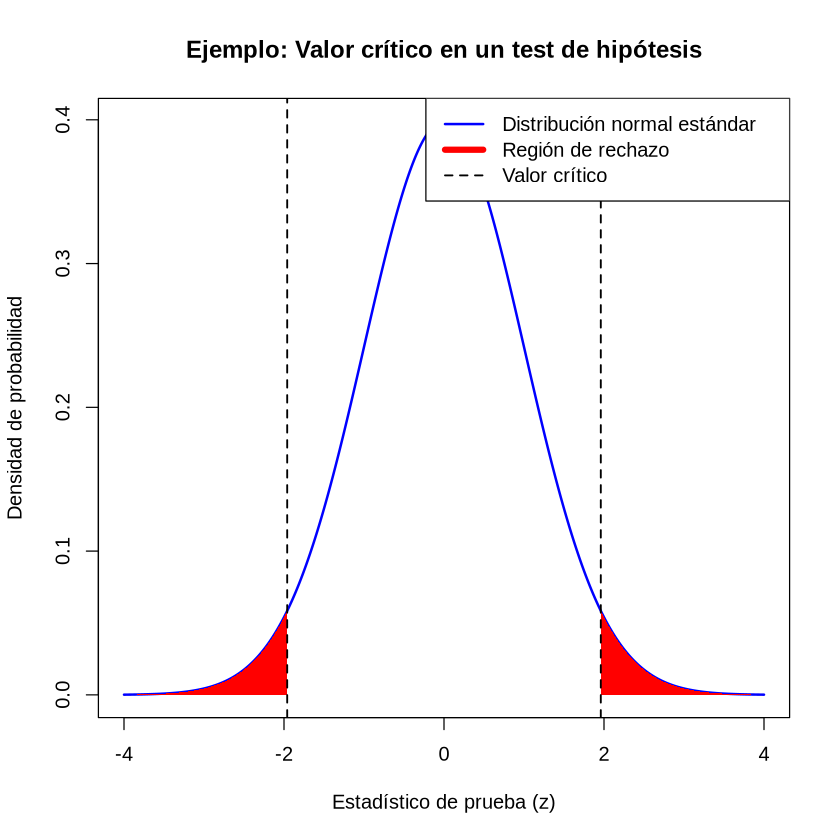

In [49]:
# secuencia para la distribución normal estándar
x <- seq(-4, 4, length = 500)
y <- dnorm(x)

# Configuración del valor crítico
z_critical <- 1.96

# Graficar la curva
plot(x, y, type = "l", lwd = 2, col = "blue", main = "Ejemplo: Valor crítico en un test de hipótesis",
     xlab = "Estadístico de prueba (z)", ylab = "Densidad de probabilidad")

# Añadir las regiones de rechazo
polygon(c(-4, seq(-4, -z_critical, length = 100), -z_critical), 
        c(0, dnorm(seq(-4, -z_critical, length = 100)), 0), col = "red", border = NA)
polygon(c(z_critical, seq(z_critical, 4, length = 100), 4), 
        c(0, dnorm(seq(z_critical, 4, length = 100)), 0), col = "red", border = NA)

# Añadir líneas verticales para los valores críticos
abline(v = c(-z_critical, z_critical), col = "black", lty = 2, lwd = 1.5)

# Añadir una leyenda
legend("topright", legend = c("Distribución normal estándar", "Región de rechazo", "Valor crítico"),
       col = c("blue", "red", "black"), lty = c(1, 1, 2), lwd = c(2, 5, 1.5))


**2. ¿Qué representa el Error Tipo II?**
1. Rechazar incorrectamente la hipótesis nula
2. No rechazar incorrectamente la hipótesis nula
3. La probabilidad de cometer un error Tipo I
4. La probabilidad de obtener un resultado significativo

**Respuesta correcta**

**2. No rechazar incorrectamente la hipótesis nula**

Justificación: El Error Tipo II ocurre cuando no se rechaza 𝐻0, aunque H1 sea verdadera.

Referencia: Según el PDF de estudio (HAVDHypothesisTests), en el tema "Comparing two Hypothesis" (página 3), menciona:
"Si 𝐻0 es aceptada a pesar de que H1 es verdadera, esto se denomina un Error Tipo II."

Esto se puede ver visualmente en el gráfico, donde el área naranja representa el Error Tipo II (𝛽) y el área roja representa el Error Tipo I (𝛼). Ambas áreas están definidas en relación con la línea de valor crítico (línea discontinua negra),que separa la región de aceptación de 𝐻0 de la región de rechazo.

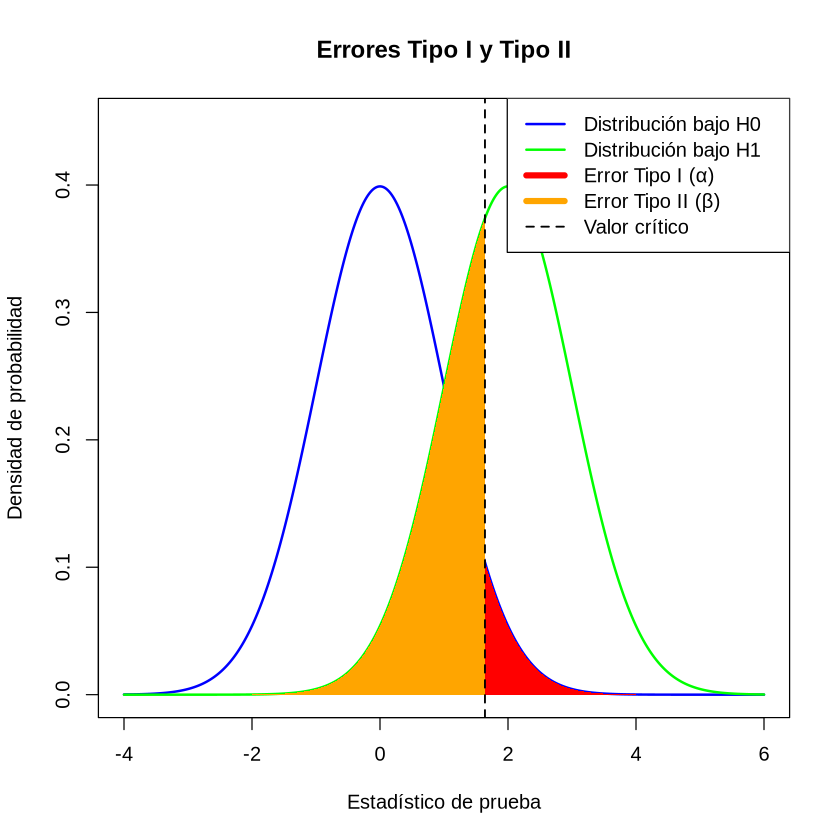

In [50]:
# secuencia para las distribuciones
x <- seq(-4, 6, length = 500)
h0 <- dnorm(x, mean = 0, sd = 1)  # Distribución bajo H0
h1 <- dnorm(x, mean = 2, sd = 1)  # Distribución bajo H1 (desplazada)

# Valor crítico para H0 (supongamos alfa = 0.05, unilateral)
z_critical <- 1.64

# Graficar la distribución bajo H0 y H1
plot(x, h0, type = "l", col = "blue", lwd = 2, ylim = c(0, 0.45),
     xlab = "Estadístico de prueba", ylab = "Densidad de probabilidad",
     main = "Errores Tipo I y Tipo II")
lines(x, h1, col = "green", lwd = 2)

# Región de rechazo (Error Tipo I)
polygon(c(z_critical, seq(z_critical, 6, length = 100), 6),
        c(0, dnorm(seq(z_critical, 6, length = 100), mean = 0, sd = 1), 0),
        col = "red", border = NA)

# Región de Error Tipo II
polygon(c(-4, seq(-4, z_critical, length = 100), z_critical),
        c(0, dnorm(seq(-4, z_critical, length = 100), mean = 2, sd = 1), 0),
        col = "orange", border = NA)

# Añadir línea del valor crítico
abline(v = z_critical, col = "black", lty = 2, lwd = 1.5)

# Añadir leyenda
legend("topright", legend = c("Distribución bajo H0", "Distribución bajo H1", 
                              "Error Tipo I (α)", "Error Tipo II (β)", "Valor crítico"),
       col = c("blue", "green", "red", "orange", "black"), 
       lty = c(1, 1, 1, 1, 2), lwd = c(2, 2, 5, 5, 1.5))


**3. Si realizas un test de una cola y obtienes un p-valor de 0.02 con un nivel de significancia de 0.05, ¿qué decisión tomarías?**

1. Rechazar la hipótesis nula
2. No rechazar la hipótesis nula
3. No hay información suficiente para tomar una decisión
4. Dependiendo de la región de no rechazo

**Respuesta correcta**
**1. Rechazar la hipótesis nula**

Justificación: En un test de una cola, si el p-valor (0,02) s menor que el nivel de significancia (α=0.05), 
se concluye que existe suficiente evidencia estadística para rechazar la hipótesis nula (H0). Esto significa que los datos 
observados son lo suficientemente extremos para apoyar la hipótesis alternativa (H1).

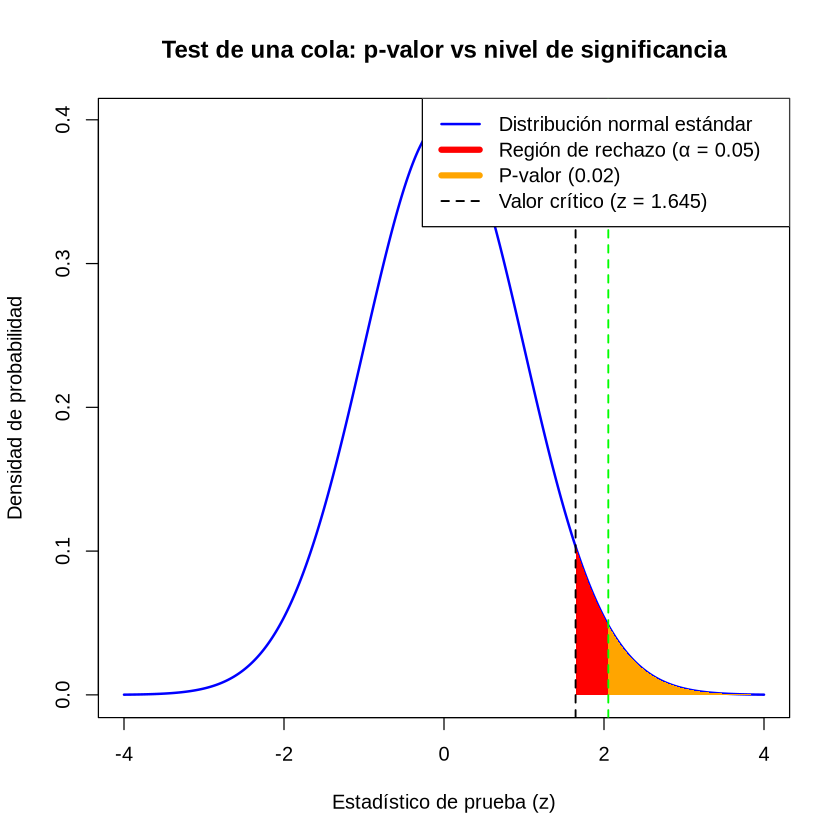

In [51]:
# secuencia para la curva normal estándar
x <- seq(-4, 4, length = 500)
y <- dnorm(x)

# Valor crítico para alfa = 0.05 (una cola)
z_critical <- qnorm(0.95)  # 95% de confianza
p_value <- qnorm(0.98)     # Punto correspondiente al p-valor (0.02 en cola derecha)

# Graficar la distribución
plot(x, y, type = "l", lwd = 2, col = "blue", main = "Test de una cola: p-valor vs nivel de significancia",
     xlab = "Estadístico de prueba (z)", ylab = "Densidad de probabilidad")

# Región de rechazo
polygon(c(z_critical, seq(z_critical, 4, length = 100), 4),
        c(0, dnorm(seq(z_critical, 4, length = 100)), 0), col = "red", border = NA)

# P-valor
polygon(c(p_value, seq(p_value, 4, length = 100), 4),
        c(0, dnorm(seq(p_value, 4, length = 100)), 0), col = "orange", border = NA)

# Añadir líneas
abline(v = z_critical, col = "black", lty = 2, lwd = 1.5)  # Línea de nivel crítico
abline(v = p_value, col = "green", lty = 2, lwd = 1.5)     # Línea de p-valor

# Añadir leyenda
legend("topright", legend = c("Distribución normal estándar", "Región de rechazo (α = 0.05)", 
                              "P-valor (0.02)", "Valor crítico (z = 1.645)"),
       col = c("blue", "red", "orange", "black"), lty = c(1, 1, 1, 2), lwd = c(2, 5, 5, 1.5))


**4. ¿Cuál es la relación entre nivel de significancia y la probabilidad de cometer un Error Tipo I?**
1. Aumentar el nivel de significancia disminuye la probabilidad de cometer un error Tipo I
2. Reducir el nivel de significancia aumenta la probabilidad de cometer un error Tipo I
3. El nivel de significancia y la probabilidad de cometer un error Tipo I no están relacionados
4. El nivel de significancia no afecta la probabilidad de cometer un error Tipo I

**Respuesta correcta**

**Ninguna de las Anteriores**

Justificación: 

1. Gráfico 1 (Nivel de significancia 𝛼=0.05):
* La región roja muestra que un mayor nivel de significancia 𝛼 incrementa el área de la región crítica, aumentando la probabilidad de cometer un Error Tipo I.

2. Gráfico 2 (Nivel de significancia 𝛼 =0.01):
* La región naranja es más pequeña porque un menor nivel de significancia reduce la probabilidad de cometer un Error Tipo I, al exigir más evidencia para rechazar H0
  
3. Gráfico 3 (Comparación de 𝛼=0.05 Y 𝛼 =0.01):
* Este gráfico compara ambas regiones críticas (roja y naranja) y muestra claramente cómo reducir 𝛼 disminuye la probabilidad de Error Tipo I.

4. Gráfico 4 (Relación entre α, β y potencia):
* La región roja representa el Error Tipo I α , mientras que la verde muestra el Error Tipo II β, Una disminución de α puede aumentar β, destacando la relación inversa entre ambos errores y su impacto en la potencia del test.

Estos gráficos justifican que ninguna de las opciones dadas es correcta, ya que la probabilidad de cometer un Error Tipo I está directamente relacionada con 𝛼, contradiciendo las opciones planteadas.


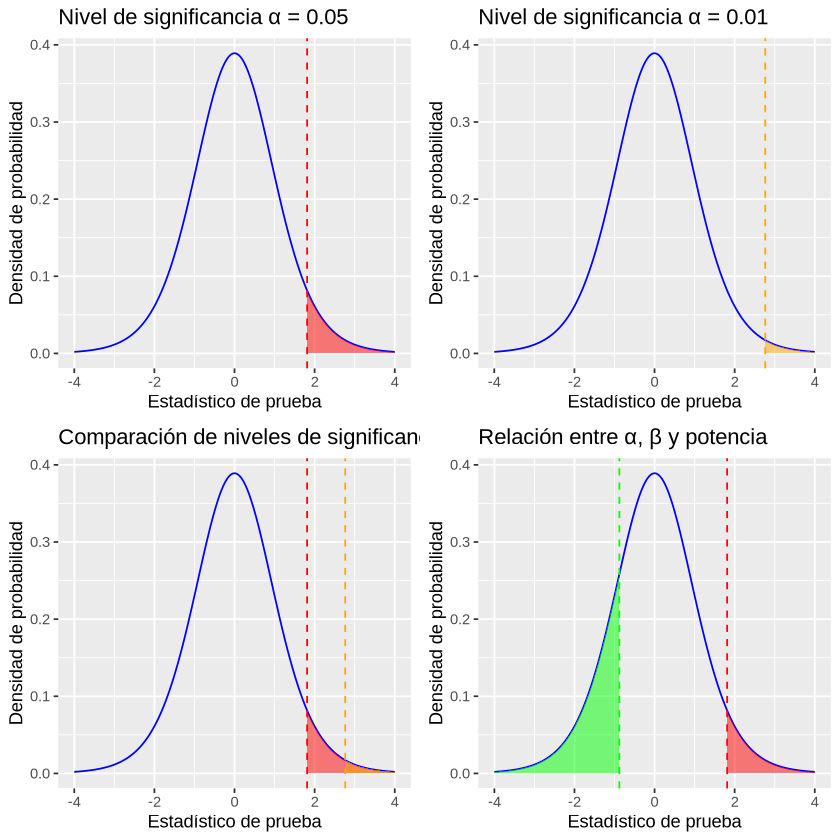

In [52]:
# Crear datos para la distribución t
x <- seq(-4, 4, length.out = 1000)
df <- 10 # Grados de libertad
t_dist <- dt(x, df)

# Valores críticos para α = 0.05 y α = 0.01
alpha_05 <- 0.05
critical_05 <- qt(1 - alpha_05, df)

alpha_01 <- 0.01
critical_01 <- qt(1 - alpha_01, df)

# Crear un data frame para graficar
data <- data.frame(x = x, t_dist = t_dist)

# 1. Gráfico para α = 0.05
plot1 <- ggplot(data, aes(x = x, y = t_dist)) +
  geom_line(color = "blue") +
  geom_area(data = subset(data, x >= critical_05), aes(x = x, y = t_dist), 
            fill = "red", alpha = 0.5) +
  geom_vline(xintercept = critical_05, color = "red", linetype = "dashed") +
  ggtitle("Nivel de significancia α = 0.05") +
  labs(x = "Estadístico de prueba", y = "Densidad de probabilidad")

# 2. Gráfico para α = 0.01
plot2 <- ggplot(data, aes(x = x, y = t_dist)) +
  geom_line(color = "blue") +
  geom_area(data = subset(data, x >= critical_01), aes(x = x, y = t_dist), 
            fill = "orange", alpha = 0.5) +
  geom_vline(xintercept = critical_01, color = "orange", linetype = "dashed") +
  ggtitle("Nivel de significancia α = 0.01") +
  labs(x = "Estadístico de prueba", y = "Densidad de probabilidad")

# 3. Comparación de niveles de significancia
plot3 <- ggplot(data, aes(x = x, y = t_dist)) +
  geom_line(color = "blue") +
  geom_area(data = subset(data, x >= critical_05), aes(x = x, y = t_dist), 
            fill = "red", alpha = 0.5) +
  geom_area(data = subset(data, x >= critical_01), aes(x = x, y = t_dist), 
            fill = "orange", alpha = 0.5) +
  geom_vline(xintercept = critical_05, color = "red", linetype = "dashed") +
  geom_vline(xintercept = critical_01, color = "orange", linetype = "dashed") +
  ggtitle("Comparación de niveles de significancia") +
  labs(x = "Estadístico de prueba", y = "Densidad de probabilidad")

# 4. Gráfico con α y β
beta <- 0.2
critical_beta <- qt(beta, df)
plot4 <- ggplot(data, aes(x = x, y = t_dist)) +
  geom_line(color = "blue") +
  geom_area(data = subset(data, x >= critical_05), aes(x = x, y = t_dist), 
            fill = "red", alpha = 0.5, show.legend = TRUE) +
  geom_area(data = subset(data, x <= critical_beta), aes(x = x, y = t_dist), 
            fill = "green", alpha = 0.5, show.legend = TRUE) +
  geom_vline(xintercept = critical_05, color = "red", linetype = "dashed") +
  geom_vline(xintercept = critical_beta, color = "green", linetype = "dashed") +
  ggtitle("Relación entre α, β y potencia") +
  labs(x = "Estadístico de prueba", y = "Densidad de probabilidad")

# Combinar y mostrar los gráficos
library(gridExtra)
grid.arrange(plot1, plot2, plot3, plot4, ncol = 2)





### <font color='#3d59c6'> PARTE II </font>
Una empresa de ecommerce B2B se plantea utilizar una funcionalidad para su web que le permite hacer una recomendación de producto a sus usuarios con el objetivo de aumentar el valor medio de las ventas. De cara a validar que este sistema de recomendación tiene un efecto positivo nuestra empresa decide plantear un Test de Hipótesis y testear el servicio durante 3 meses antes de decidir si lo deben adoptar o no en base al posible efecto incremental en las ventas. El dataset adjunto incluye los datos finales del test y contiene tres columnas. La primera es el identificador de la venta, la segunda es el valor de la venta y el tercero es la clase (1 para las ventas en las que el sistema de recomendación ha participado y 0 en las que no ha participado)

###### Data:
202411s13_b2b_ecommerce_sales_data.csv

###### Se pide:
1. Exploración de los datos: análisis descriptivos de los datos, gráficación y conclusiones ¿siguen una distribución normal?(2pts)
2. Diseña un test de hipótesis: ¿cuál es nuestro objetivo? ¿se trataría de un test de 2 colas? ¿Qué estadístico debemos usar para este Test?(2pts)
3. Validación y ejecución del test de hipótesis (2pts)
4. Conclusiones: ¿Recomendarías el uso de este sistema de recomendación? (justifica tu respuesta) ¿Qué factores se deben tener en cuenta para la toma de esta decisión? (2pts)

Entrega: fichero Jupyter Notebook con MD004NombreApellidosAC03.ipynb y MD004NombreApellidosAC03.pdf

Plazo: Miércoles, 20 de Noviembre a las 19h

In [53]:
# Ejecuta esto en una celda de Python para instalar R en Google Colab
#!apt update -qq && apt install -y r-base

In [54]:
# Ejecuta esto en una celda de Python para instalar el kernel de R
#!R -e "install.packages('IRkernel'); IRkernel::installspec(user = FALSE)"

In [55]:
#print("R está funcionando en Google Colab")

In [56]:
#from google.colab import drive
#drive.mount('/content/drive')

In [57]:
library("ggplot2") #Violin Plot, Boxplot, Bar Plot


**Definicion de las Hipotesis**

* Hipótesis nula (H₀): El sistema de recomendación no mejora las ventas, es decir, la media del Grupo 1 es menor o igual a la del Grupo 0.
* Hipótesis alternativa (H₁): El sistema de recomendación mejora las ventas, es decir, la media del Grupo 1 es mayor que la del Grupo 0.

In [58]:

ecommerce <- read.csv("202411s13_b2b_ecommerce_sales_data.csv")

head(ecommerce)

,Reference,Order.Value,Group
,<int>,<dbl>,<int>
1,570554,0.38,1
2,567869,0.40,0
3,539441,0.42,0
4,542736,0.55,0
5,573589,0.55,0
6,540833,0.65,1


In [59]:
#numero de filas y columnas
dim(ecommerce)

[1] 11786     3

In [60]:
#nombre de las columnas
names(ecommerce)

[1] "Reference"   "Order.Value" "Group"

In [61]:
#entender las categorias de lo datos
str(ecommerce)

'data.frame':	11786 obs. of  3 variables:
 $ Reference  : int  570554 567869 539441 542736 573589 540833 560217 542136 549534 540945 ...
 $ Order.Value: num  0.38 0.4 0.42 0.55 0.55 0.65 0.79 0.84 0.84 0.85 ...
 $ Group      : int  1 0 0 0 0 1 1 1 1 0 ...


In [62]:
#coroborar si existen duplicadpos
sum(duplicated(ecommerce$Reference))

[1] 0

In [63]:
# Verificar si hay valores NA en las columnas Current y New
sum(is.na(ecommerce$Reference))
sum(is.na(ecommerce$Order.Value))
sum(is.na(ecommerce$Group))

[1] 0

[1] 0

[1] 0

## No hay valores nulls ni valores atipicos

## Luego de un analisis de que dato es relevante para este trabajo del test de Hipotesis, he decidio separar la columna order.value en dos dataset Group_0 y Group_1 y asi facilitar todas las medidas estaditicas

In [64]:
# Dividir el dataset en dos subconjuntos basados en Group
Group_0 <- ecommerce$Order.Value[ecommerce$Group == 0]  # Ventas sin recomendación
Group_1 <- ecommerce$Order.Value[ecommerce$Group == 1]  # Ventas con recomendación

In [65]:
#cuenta el numero de filas de cada grupo
length(Group_0)
length(Group_1)

[1] 5502

[1] 6284

In [66]:
#resumen estadistico
summary(Group_0,Group_1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.4   475.2  2170.6  3024.8  5191.5  9471.3 

In [67]:
#observar los datos de lacolumnas separadas por grupos
head(Group_0)
head(Group_1)

[1] 0.40 0.42 0.55 0.55 0.85 0.85

[1] 0.38 0.65 0.79 0.84 0.84 0.85

In [68]:
# Resumen descriptivo para cada grupo
summary(Group_0)  # Resumen para las ventas sin recomendación

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.4   475.2  2170.6  3024.8  5191.5  9471.3 

In [69]:
# Resumen descriptivo para cada grupo
summary(Group_1) # Resumen para las ventas con recomendación

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.38  601.39 2526.08 3173.84 5283.07 9476.80 

In [70]:
mean(Group_0)  # Media de ventas sin recomendación
mean(Group_1)  # Media de ventas con recomendación
sd(Group_0)    # Desviación estándar sin recomendación
sd(Group_1)    # Desviación estándar con recomendación

[1] 3024.787

[1] 3173.837

[1] 2817.731

[1] 2795.303

In [71]:
# Calcular la desviación estándar para cada grupo de datos
cat("SD for Variable Group_0: ", sd(Group_0),  # Desviación estándar del grupo 0
    "; SD for Variable Group_1: ", sd(Group_1), "\n")  # Desviación estándar del grupo 1


SD for Variable Group_0:  2817.731 ; SD for Variable Group_1:  2795.303 


In [72]:
# Calcular la varianza para cada grupo de datos
cat("Variance for Variable Group_0: ", var(Group_0),  # Varianza del grupo 0
    "; Variance for Variable Group_1: ", var(Group_1), "\n")  # Varianza del grupo 1


Variance for Variable Group_0:  7939606 ; Variance for Variable Group_1:  7813720 


In [73]:
# Ajustar las longitudes de los grupos para calcular la diferencia
min_length <- min(length(Group_0), length(Group_1))  # Obtener la longitud mínima entre los dos grupos
Group_0_aligned <- Group_0[1:min_length]  # Truncar el grupo 0 a la longitud mínima
Group_1_aligned <- Group_1[1:min_length]  # Truncar el grupo 1 a la longitud mínima

# Calcular la desviación estándar de las diferencias entre los dos grupos alineados
cat("SD for difference between Group_1 and Group_0: ", 
    sd(Group_1_aligned - Group_0_aligned), "\n")  # Desviación estándar de las diferencias


SD for difference between Group_1 and Group_0:  687.2695 


In [74]:
cat("Outliers in Group_0: ", boxplot(Group_0, plot = F)$out,  # Obtiene los valores atípicos del grupo 0
    "; Outliers in Group_1: ", boxplot(Group_1, plot = F)$out)  # Obtiene los valores atípicos del grupo 1

#no existen valores atipicos 

Outliers in Group_0:   ; Outliers in Group_1:  

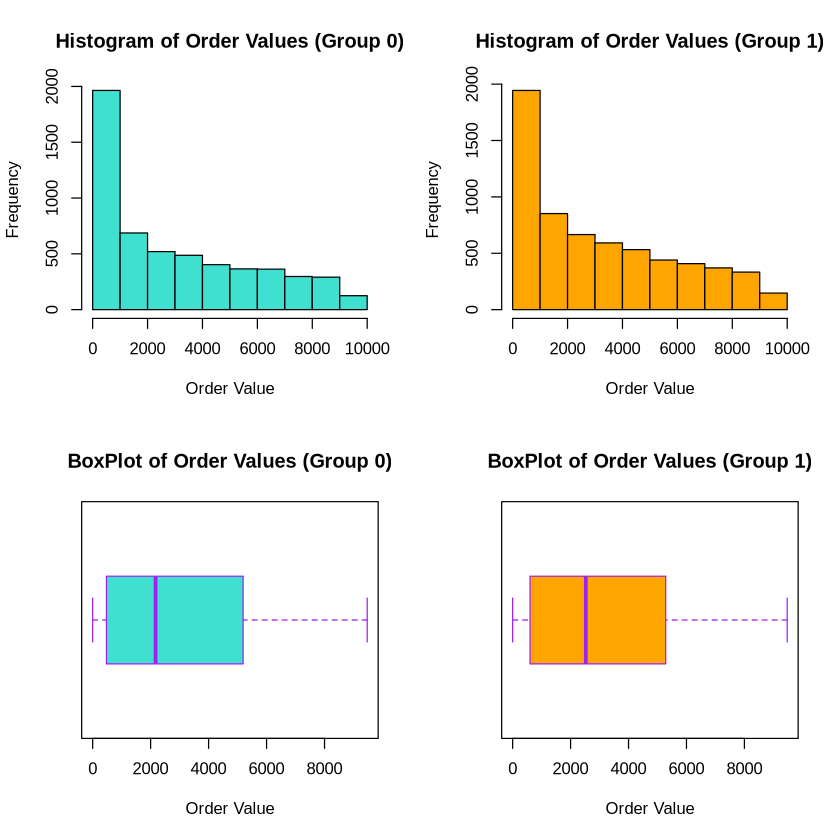

In [75]:
# histogramas separados para Group_0 y Group_1
par(mfrow = c(2, 2))  # Panel para 4 gráficos

# Histograma para Group = 0
hist(Group_0,
     breaks = seq(0, 10000, by = 1000),
     freq = TRUE,
     include.lowest = TRUE,
     right = TRUE,
     col = "turquoise",
     border = 9,
     main = "Histogram of Order Values (Group 0)",
     xlab = "Order Value",
     ylab = "Frequency")

# Histograma para Group = 1
hist(Group_1,
     breaks = seq(0, 10000, by = 1000),
     freq = TRUE,
     include.lowest = TRUE,
     right = TRUE,
     col = "orange",
     border = 9,
     main = "Histogram of Order Values (Group 1)",
     xlab = "Order Value",
     ylab = "Frequency")

# Boxplot para Group = 0
boxplot(Group_0,
        col = "turquoise",
        border = "purple",
        main = "BoxPlot of Order Values (Group 0)",
        xlab = "Order Value",
        horizontal = TRUE)

# Boxplot para Group = 1
boxplot(Group_1,
        col = "orange",
        border = "purple",
        main = "BoxPlot of Order Values (Group 1)",
        xlab = "Order Value",
        horizontal = TRUE)

**Histogramas:
Ambos grupos muestran distribuciones sesgadas hacia la izquierda, lo que indica que la mayoría de los valores están concentrados en los rangos más bajos de Order Value.**

**Boxplots:
Los datos parecen estar bien distribuidos dentro del rango esperado, sin valores atípicos según el criterio del rango intercuartílico (IQR). Esto es un buen indicador para continuar con el análisis sin preocuparte por los outliers.**

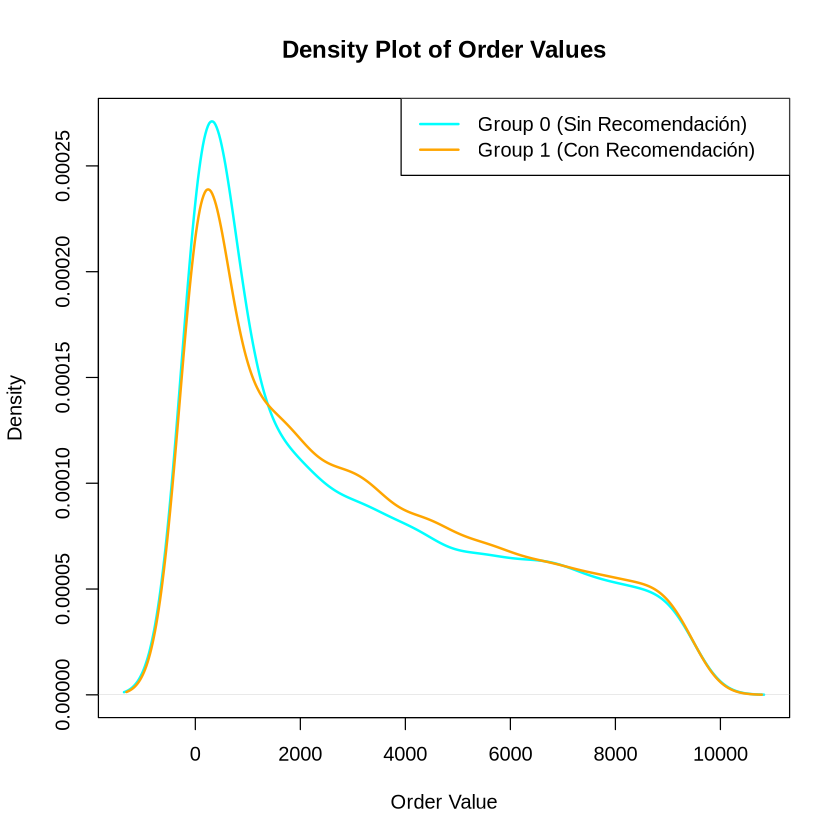

In [76]:
# Gráfico de densidad para ambos grupos
plot(density(Group_0), col = "cyan", lwd = 2, main = "Density Plot of Order Values", xlab = "Order Value")
lines(density(Group_1), col = "orange", lwd = 2)
legend("topright", legend = c("Group 0 (Sin Recomendación)", "Group 1 (Con Recomendación)"),
       col = c("cyan", "orange"), lwd = 2)


**Aunque las distribuciones son casi idénticas, el Grupo 1 parece tener una mayor probabilidad de valores en los rangos medios, lo que sugiere un efecto positivo de las recomendaciones en ciertos casos.**

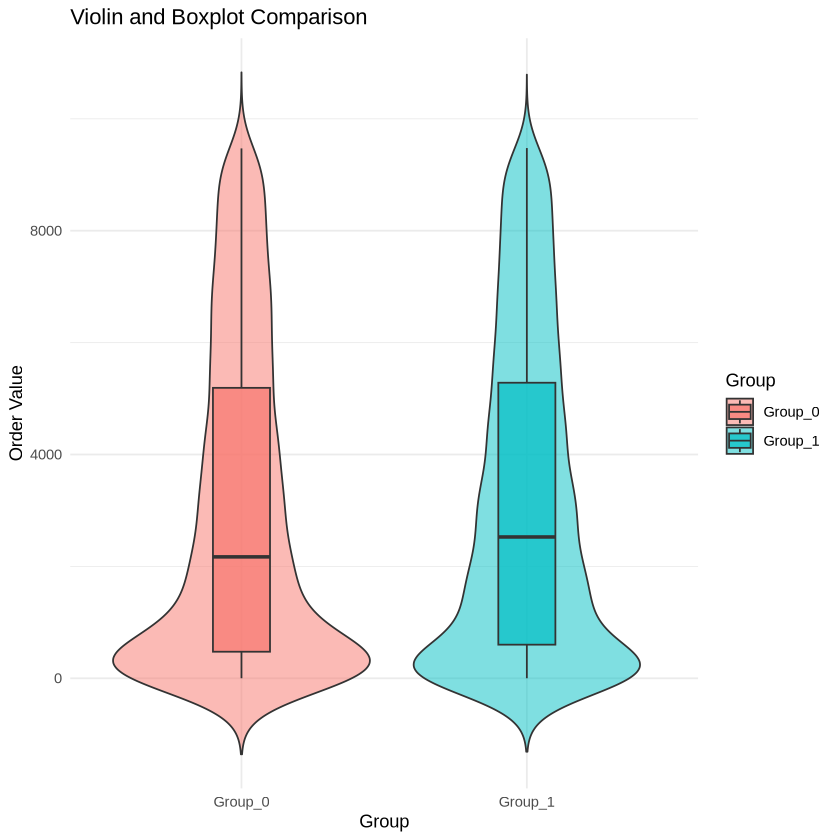

In [77]:

combined_data <- data.frame(Value = c(Group_0, Group_1),
                            Group = factor(c(rep("Group_0", length(Group_0)), rep("Group_1", length(Group_1)))))

ggplot(combined_data, aes(x = Group, y = Value, fill = Group)) +
  geom_violin(trim = FALSE, alpha = 0.5) +
  geom_boxplot(width = 0.2, position = position_dodge(0.9), outlier.colour = "red", alpha = 0.7) +
  labs(title = "Violin and Boxplot Comparison", x = "Group", y = "Order Value") +
  theme_minimal()


**Aunque la forma general es similar, las recomendaciones podrían estar contribuyendo a un leve aumento en órdenes con valores intermedios.**

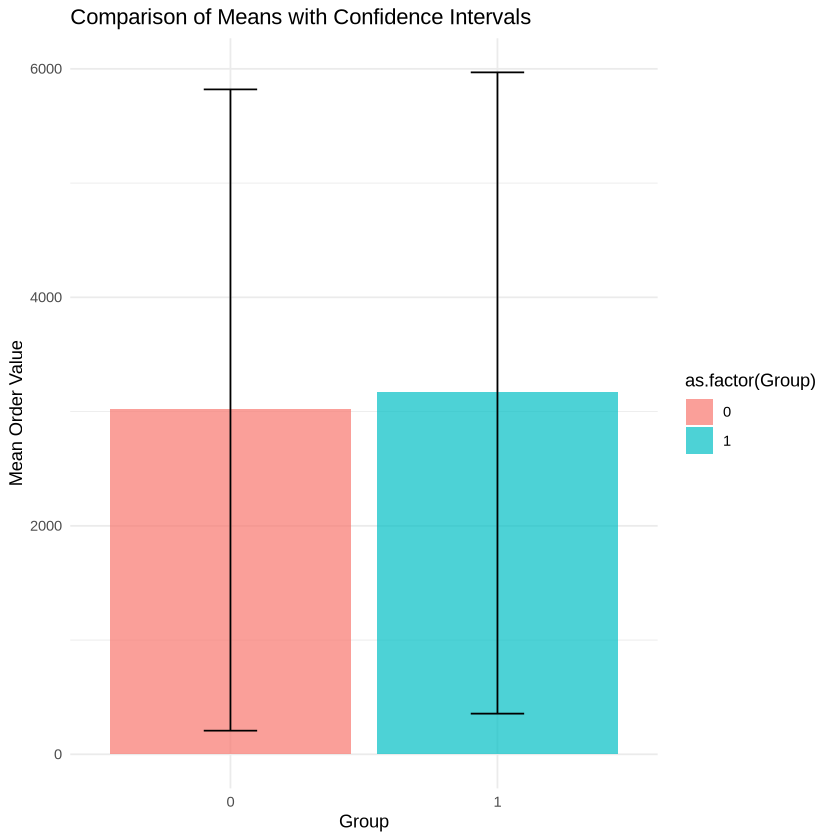

In [78]:

means <- aggregate(Order.Value ~ Group, data = ecommerce, mean)
ggplot(means, aes(x = as.factor(Group), y = Order.Value, fill = as.factor(Group))) +
  geom_bar(stat = "identity", position = position_dodge(), alpha = 0.7) +
  geom_errorbar(aes(ymin = Order.Value - sd(Group_0), ymax = Order.Value + sd(Group_1)), width = 0.2) +
  labs(title = "Comparison of Means with Confidence Intervals", x = "Group", y = "Mean Order Value") +
  theme_minimal()


**aunque la media del Grupo 1 es mayor, la alta variabilidad hace difícil determinar si la diferencia es relevante sin más análisis.**

In [79]:
print("PRUEBA DE WILCOXON DE UNA COLA")
# Realiza una prueba de Wilcoxon para comparar si los valores de Group_1 tienden a ser mayores que los de Group_0,
# con un nivel de confianza del 95%.
wilcox.test(Group_1, Group_0, 
            alternative = "greater", 
            conf.level = 0.95)

[1] "PRUEBA DE WILCOXON DE UNA COLA"



	Wilcoxon rank sum test with continuity correction

data:  Group_1 and Group_0
W = 17842318, p-value = 0.001298
alternative hypothesis: true location shift is greater than 0


**P-value:** 0.001298:
* Este resultado es menor que el nivel de significancia (0.05), lo que indica que podemos rechazar la hipótesis nula.

**Conclusión:**

* Hay evidencia estadísticamente significativa para concluir que las ventas con recomendación (Group_1) son mayores que las ventas sin recomendación (Group_0).

In [80]:
print("T TEST DE MEDIAS INDEPENDIENTES CON DOS MUESTRAS DE DOS COLAS")
t.test(Group_1,Group_0, 
       paired = F,          # Este parámetro indica si las muestras son pareadas (paired = TRUE) o independientes (paired = FALSE).
                            # Si se trata de una prueba en la que las mismas personas o unidades están en ambas muestras, usa paired = TRUE.
                            # En este ejemplo, estamos asumiendo que las muestras son independientes.

       conf.level = 0.95,   # Este parámetro establece el nivel de confianza del intervalo de confianza que se calculará.
                            # Su valor puede ser cualquier número entre 0 y 1, donde 0.95 es el valor común para un 95% de confianza.
                            # Si se desea más certeza en el intervalo (por ejemplo, 99%), se puede ajustar a 0.99.

       alternative = "g")   # Este parámetro establece el tipo de hipótesis alternativa.
                            # Las opciones posibles son "two.sided" o "t" (prueba bilateral), "less" o "l" (prueba unilateral izquierda) y "greater" o "g" (prueba unilateral derecha).
                            # "two.sided" prueba si las medias son diferentes en cualquier dirección (es la opción por defecto).
                            # "less" evalúa si la media de la primera muestra es menor que la de la segunda.
                            # "greater" evalúa si la media de la primera muestra es mayor que la de la segunda.

[1] "T TEST DE MEDIAS INDEPENDIENTES CON DOS MUESTRAS DE DOS COLAS"



	Welch Two Sample t-test

data:  Group_1 and Group_0
t = 2.8757, df = 11554, p-value = 0.002019
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 63.78874      Inf
sample estimates:
mean of x mean of y 
 3173.837  3024.787 


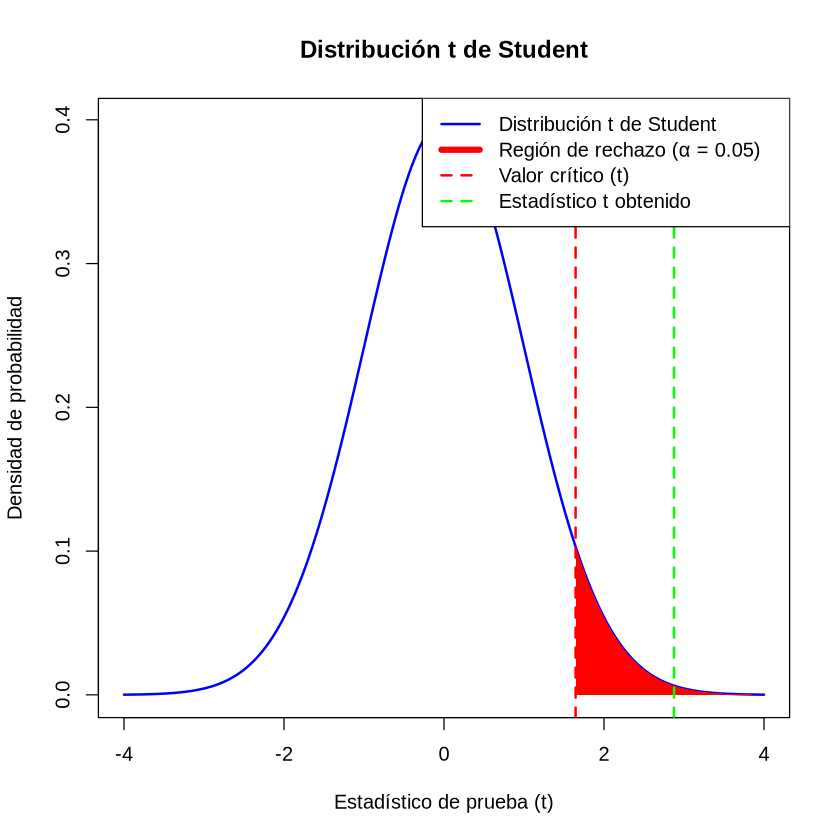

In [81]:
# Parámetros del t-test
t_value <- 2.8757  # Estadístico t obtenido
df <- 11554        # Grados de libertad
alpha <- 0.05      # Nivel de significancia
critical_value <- qt(1 - alpha, df)  # Valor crítico para una cola (hipótesis alternativa: mayor)

# Crear secuencia para la distribución t
x <- seq(-4, 4, length = 1000)  # Rango de valores
y <- dt(x, df)                  # Densidad de la distribución t

# Graficar la distribución t de Student
plot(x, y, type = "l", lwd = 2, col = "blue",
     main = "Distribución t de Student",
     xlab = "Estadístico de prueba (t)", ylab = "Densidad de probabilidad")

# Región de rechazo (similar al primer gráfico)
polygon(c(critical_value, seq(critical_value, 4, length = 100), 4),
        c(0, dt(seq(critical_value, 4, length = 100), df), 0),
        col = "red", border = NA)

# Línea del valor crítico
abline(v = critical_value, col = "red", lwd = 2, lty = 2)  

# Línea del estadístico t obtenido
abline(v = t_value, col = "green", lwd = 2, lty = 2)       

# Añadir leyenda (formato similar al primer gráfico)
legend("topright", legend = c("Distribución t de Student", 
                              "Región de rechazo (α = 0.05)", 
                              "Valor crítico (t)", 
                              "Estadístico t obtenido"),
       col = c("blue", "red", "red", "green"), 
       lty = c(1, 1, 2, 2), lwd = c(2, 5, 2, 2))



**Hipótesis evaluada:**

* H0: La media de Group_1 (ventas con recomendación) es menor o igual a la media de Group_0 (ventas sin recomendación).
* H1: La media de Group_1 es mayor que la de Group_0.
  
**Resultado:**

* Estadístico t: 2.8757 (positivo, porque la media de Group_1 es mayor que la de Group_0).
* P-value: 0.002019, lo cual es menor que el nivel de significancia (0.05).

**Conclusión:**

* Hay evidencia estadísticamente significativa para rechazar la hipótesis nula.
* Esto sugiere que las ventas con recomendación (Group_1) son mayores que las ventas sin recomendación (Group_0).